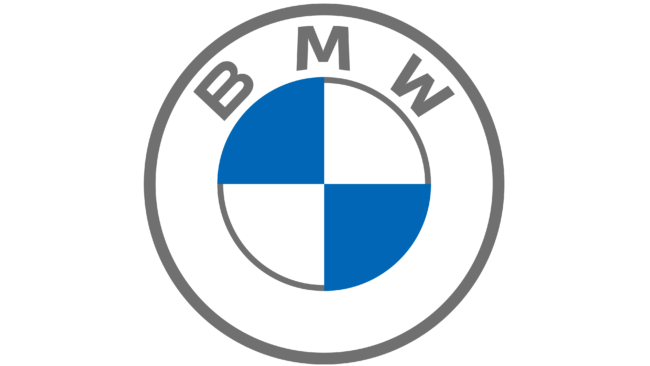

# Predicting prices on BMW cars.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

bmw = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv')
bmw.head(10)

Looking data in order to find missing values that could affect our analysis.

In [ ]:
bmw.shape

In [ ]:
bmw.info()

Calculating some metrics.

In [ ]:
bmw.describe()

In [ ]:
bmw['model'].unique()

Plotting a graph that shows the density in every BMW model according to the price.

In [ ]:
fig = plt.figure(figsize=(20,20))
sns.violinplot(x='model',y='price',data=bmw,scale='width')

This histogram shows that most of the cars that are in sale are under 50000 miles of usage.

In [ ]:
plt.hist(x='mileage',data=bmw,bins=50,histtype='stepfilled',label='mileage')

In [ ]:
bmw_one = pd.get_dummies(bmw,columns=['model','transmission','fuelType'])

In [ ]:
bmw_one.head(10)

Correlation between columns after getting dummies.

In [ ]:
bmw_one.corrwith(bmw_one['price'])

# Making predictions.

In [ ]:
from sklearn.model_selection import train_test_split
X = bmw_one.drop(['price'],axis=1)
y = bmw_one['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0,max_depth=6,n_estimators=120)
gbr.fit(X_train,y_train)
gbr.score(X_test,y_test)

RandomForestRegressor and GradientBoostingRegressor seem to be the best models to predict prices with a score of 0.95, or in other way, with 95% of accuracy. 

In [ ]:
results = X_test.copy()
results['predicted_lr'] = lr.predict(X_test)
results['predicted_rfr'] = rfr.predict(X_test)
results['predicted_gbr'] = gbr.predict(X_test)
results['Real']= y_test
results = results[['predicted_lr', 'predicted_rfr', 'predicted_gbr', 'Real']]
results

In [ ]:
sns.pairplot(results,x_vars=['predicted_lr', 'predicted_rfr','predicted_gbr'],y_vars=['Real'],kind='reg',height=7,aspect=1)